THE FOLLOWING DATASET CONSISTS OF DATA RELATED TO MALL CUSTOMERS
THE DEMOGRAPHICS INCLUDE:
*CUSTOMER ID
*GENRE
*AGE
*ANNUAL INCOME(K$)
*SPENDING SCORE(1-100)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

import plotly as py
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Mall_Customers (2).csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

EXPLORATORY DATA ANALYSIS



In [ ]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum() #no null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df=df.drop('CustomerID',axis=1)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df1=df.iloc[:,1:4]
df1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


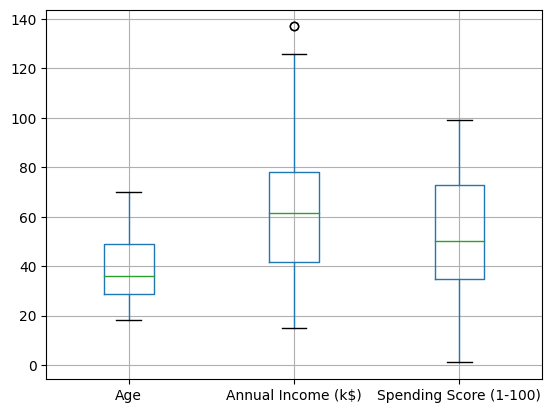

In [ ]:
df1.boxplot()
plt.show()

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

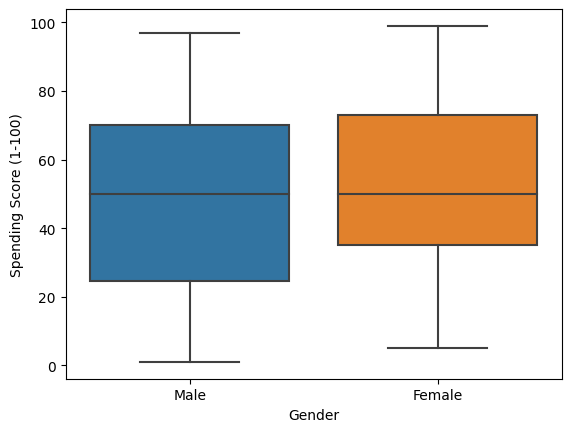

In [ ]:
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')

In [ ]:
df.groupby('Gender').describe()

Age                                                       \
        count       mean        std   min    25%   50%   75%   max   
Gender                                                               
Female  112.0  38.098214  12.644095  18.0  29.00  35.0  47.5  68.0   
Male     88.0  39.806818  15.514812  18.0  27.75  37.0  50.5  70.0   

       Annual Income (k$)             ...                \
                    count       mean  ...    75%    max   
Gender                                ...                 
Female              112.0  59.250000  ...  77.25  126.0   
Male                 88.0  62.227273  ...  78.00  137.0   

       Spending Score (1-100)                                              \
                        count       mean       std  min   25%   50%   75%   
Gender                                                                      
Female                  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0   
Male                     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0   

              
         max  
Gender        
Female  99.0  
Male    97.0  

[2 rows x 24 columns]

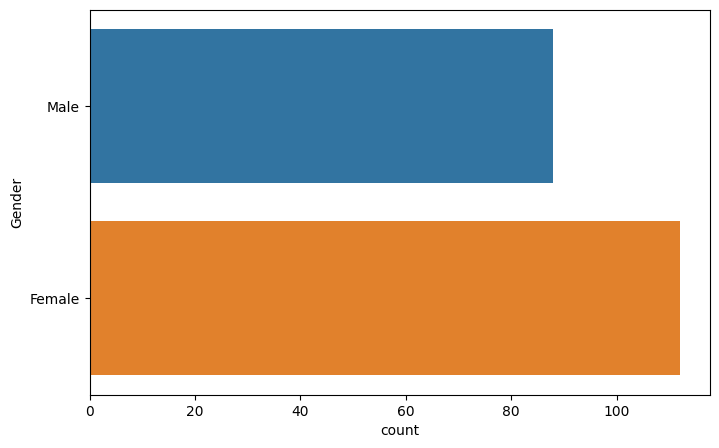

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y='Gender',data=df)
plt.show()

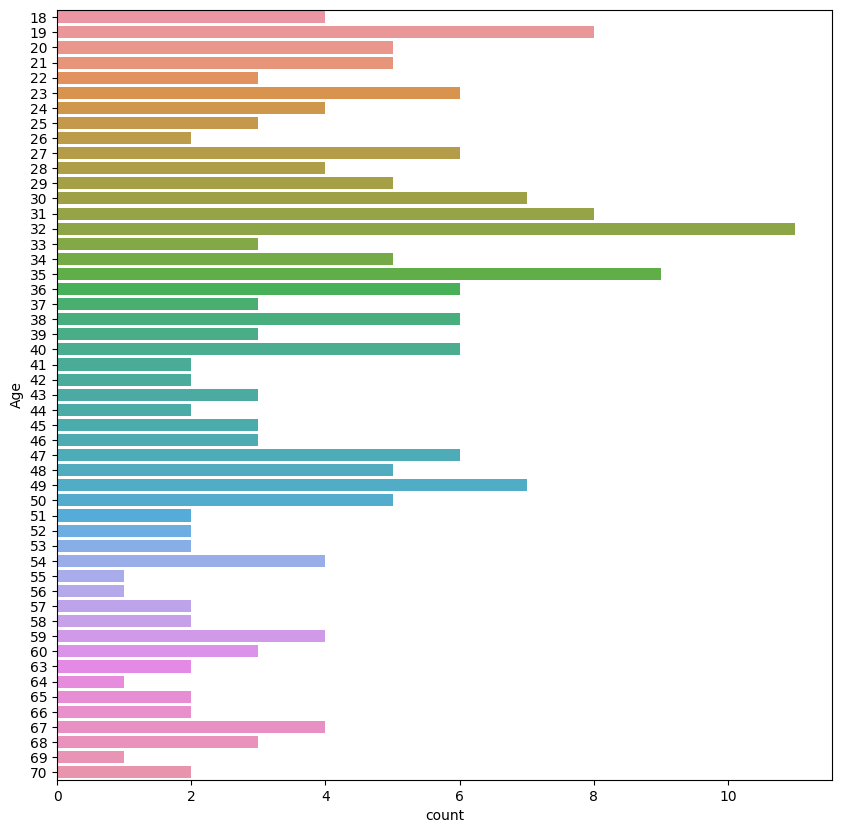

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y='Age',data=df)
plt.show()

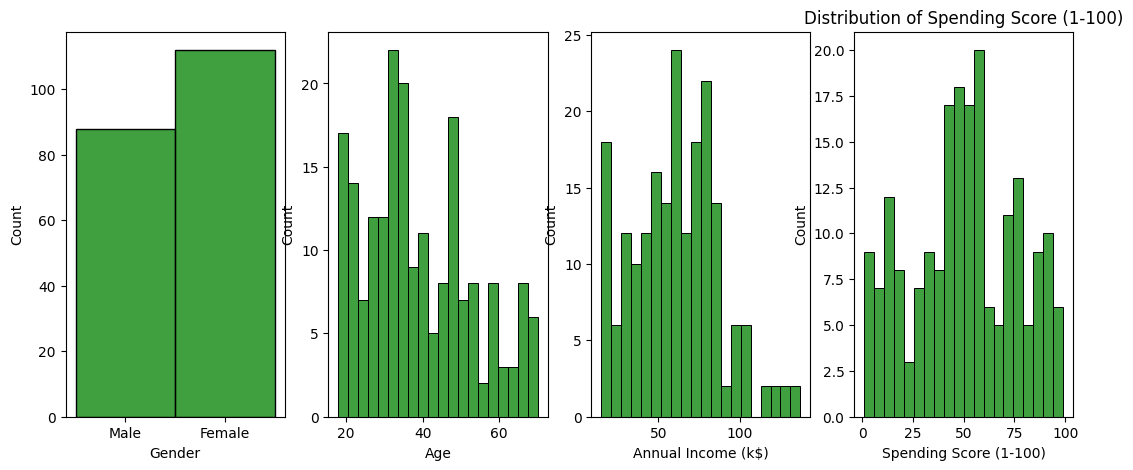

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=4, figsize=(13,5))
for index,col in enumerate(['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']) :
    sns.histplot(data=df, x=col,color='green',edgecolor='black', bins=20,ax=axes[index])
    plt.title(f'Distribution of {col}')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, y='Spending Score (1-100)', x='Age',color='Age')

fig.show()

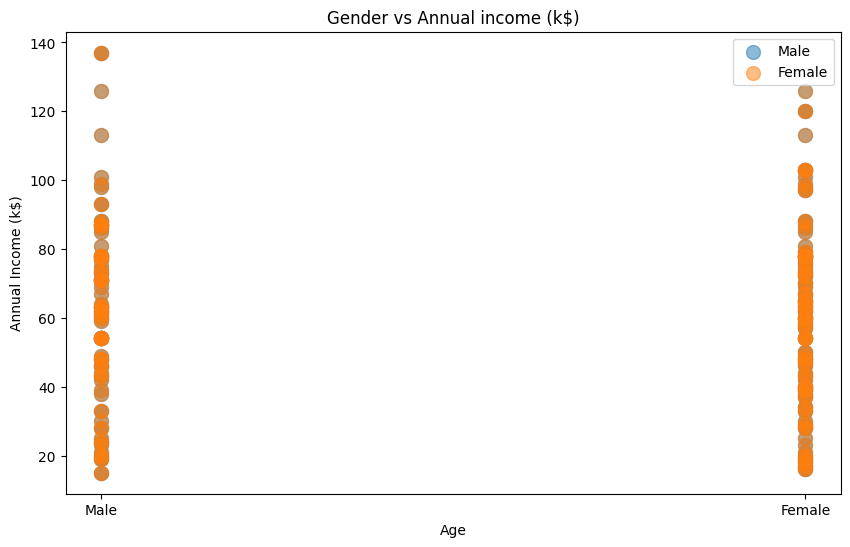

In [ ]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Gender' , y = 'Annual Income (k$)' , data = df,
                s = 100 , alpha = 0.5 , label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Gender vs Annual income (k$)')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, y='Spending Score (1-100)', x='Annual Income (k$)',color='Annual Income (k$)')

fig.show()

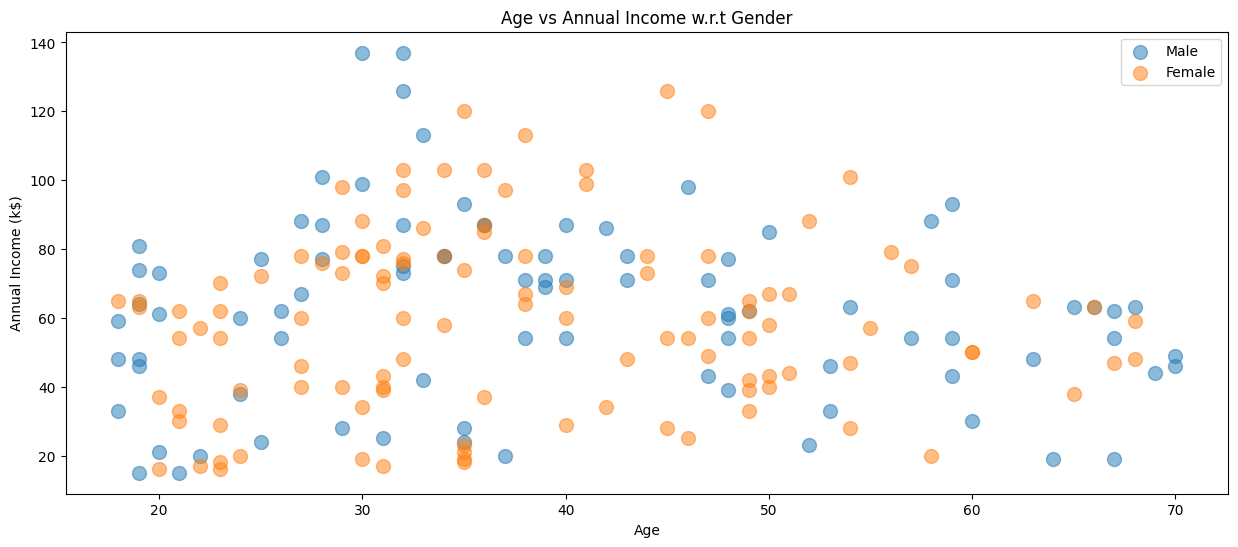

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 100 , alpha = 0.5 , label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

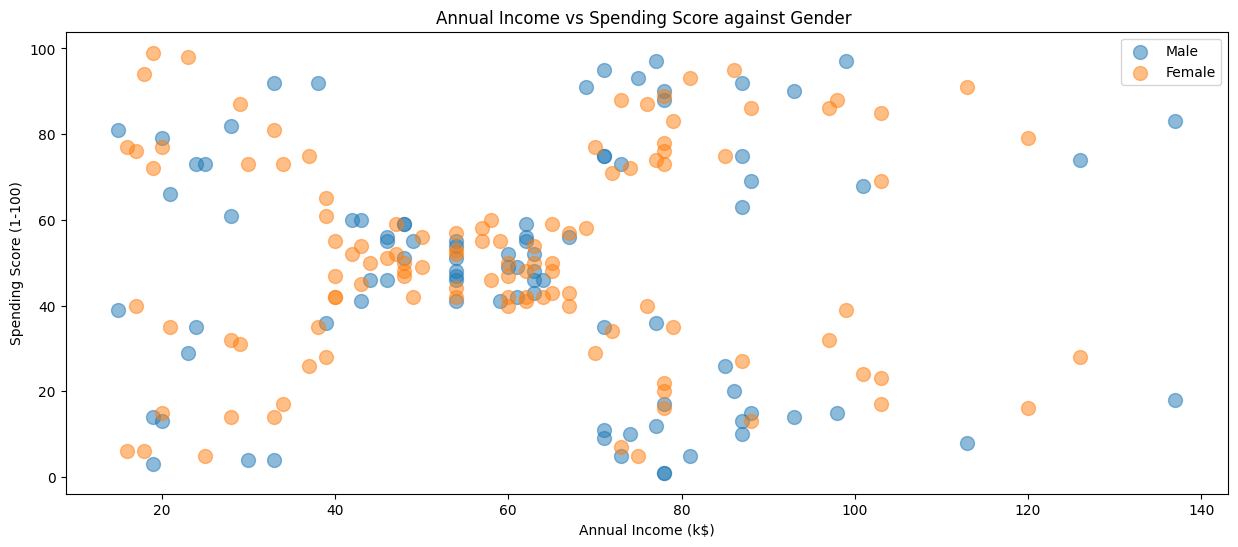

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 100 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score against Gender ')
plt.legend()
plt.show()

In [ ]:
x=df.iloc[:,1:3]
x

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [ ]:
# Select features and target
x=df.iloc[:,0:3]
y = df['Spending Score (1-100)']

In [ ]:
# Feature engineering
# handle cantegorical features
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
#fit the encoder to the category and transform the data
df['Gender']=encoder.fit_transform(df['Gender'])
#print the encoded category
print(df['Gender'])
#1=male;0=female

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64


In [ ]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [ ]:
x.dtypes

Gender                int64
Age                   int64
Annual Income (k$)    int64
dtype: object

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
pd.DataFrame(x).isna().sum()

Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} :- \t Accuracy = {accuracy:.2f}")

LogisticRegression() :- 	 Accuracy = 0.02
GaussianNB() :- 	 Accuracy = 0.00
DecisionTreeClassifier() :- 	 Accuracy = 0.02
RandomForestClassifier() :- 	 Accuracy = 0.04
KNeighborsClassifier() :- 	 Accuracy = 0.06


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
#COMPARISON BETWEEN ANNUAL INCOME AND SPENDING SCORE

In [ ]:
A = list(zip(df['Annual Income (k$)'],df['Spending Score (1-100)']))
A[:3]

[(15, 39), (15, 81), (16, 6)]

In [ ]:
wcss=[]
k_values=range(1,10)
for K in k_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(A)
    wcss.append(kmeans.inertia_)



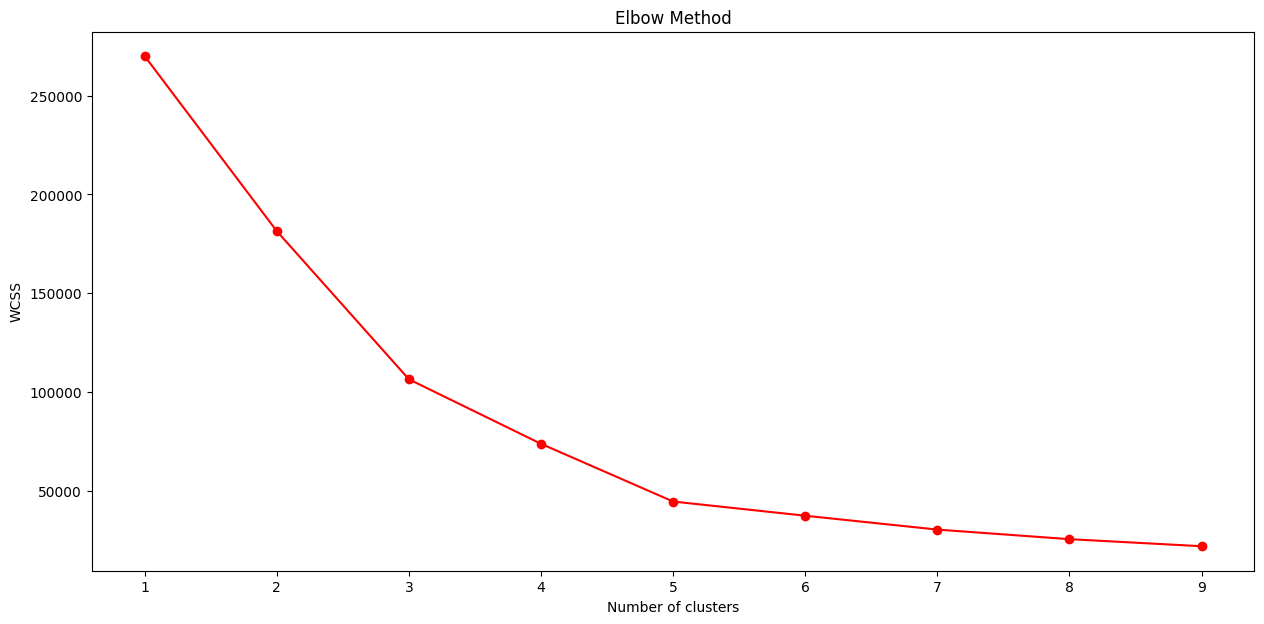

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(k_values, wcss, c='r', marker='o')
plt.xticks(k_values)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

#The graph appears to be like an arm, the elbow point is the optimal value of K, after which WCSS value decreases significantly.

#Hence, K = 5 looks to be optimal.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(A)
centroids = kmeans.cluster_centers_
print(centroids)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


In [ ]:
cluster = kmeans.predict(A)
cluster

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
clusters = df[['Annual Income (k$)', 'Spending Score (1-100)']]
clusters['Cluster'] = cluster
clusters.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


In [ ]:
labels = ["Cluster "+str(c+1) for c in clusters['Cluster']]
set(labels)

{'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'}

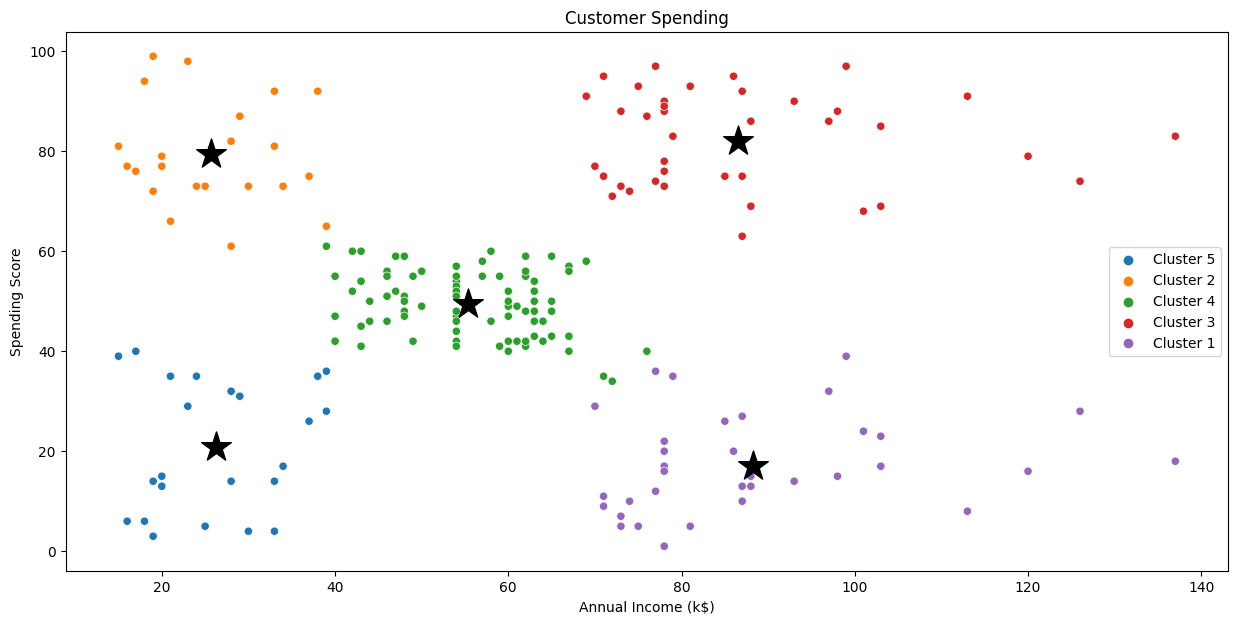

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(figsize=(15,7))
# plot clusters
sns.scatterplot(x=clusters['Annual Income (k$)'], y=clusters['Spending Score (1-100)'], ax=axes, hue=labels, legend='full')
# plot centroid
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, c='k', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel("Spending Score")
plt.title("Customer Spending")
plt.show()

In [ ]:
# MODEL IDENTIFIED FIVE CATEGORIES OF CUSTOMERS ANNUAL INCOME RELATED TO SPENDING SCORE

In [ ]:
#SEGMENTATION BETWEEN AGE AND SPENDING SCORE

In [ ]:
X = list(zip(df['Age'],df['Spending Score (1-100)']))
X[:3]

[(19, 39), (21, 81), (20, 6)]

In [ ]:
wcss = []
k_values = range(1,16)  # K clusters from 1 to 15
for K in k_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

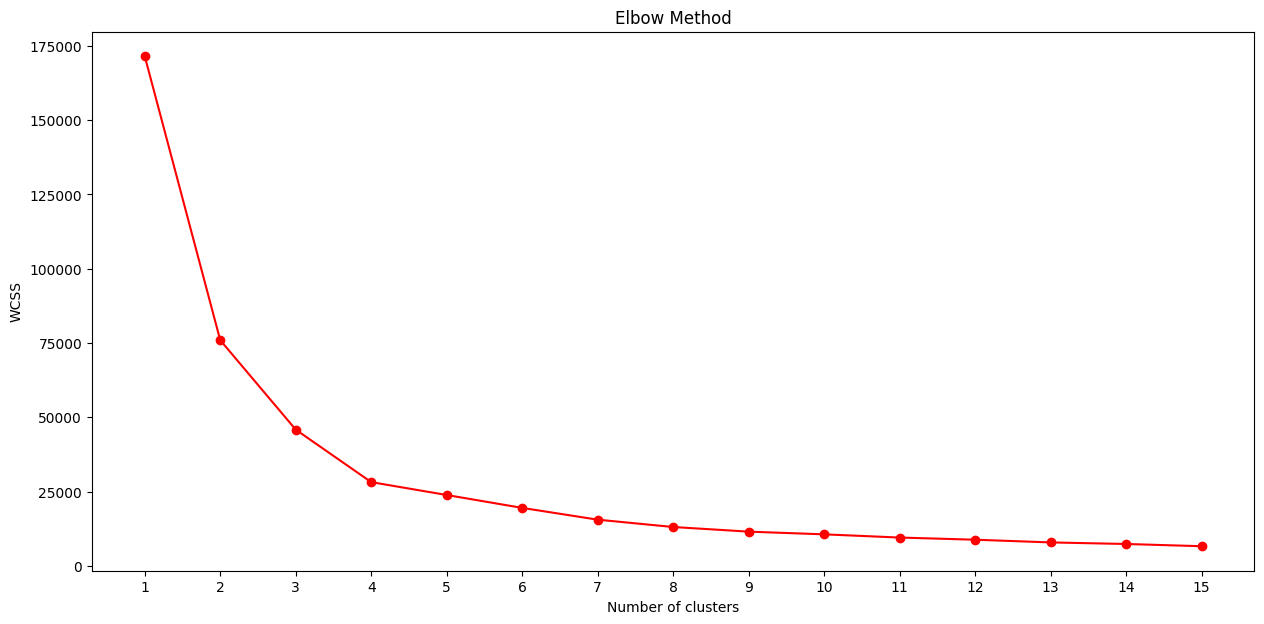

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(k_values, wcss, c='r', marker='o')
plt.xticks(k_values)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
#The graph appears to be like an arm, the elbow point is the optimal value of K, after which WCSS value decreases significantly.
#Hence, K = 4 looks to be optimal.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


In [ ]:
cluster = kmeans.predict(X)
cluster

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
clusters = df[['Age', 'Spending Score (1-100)']]
clusters['Cluster'] = cluster
clusters.head()

,Age,Spending Score (1-100),Cluster
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0


In [ ]:
clusters['Cluster'].value_counts()

1    57
2    48
3    48
0    47
Name: Cluster, dtype: int64

In [ ]:
# sort by cluster
clusters = clusters.sort_values(by='Cluster')
clusters.sample(3)

,Age,Spending Score (1-100),Cluster
36,42,17,2
77,40,48,0
42,48,36,3


In [ ]:
labels = ["Cluster "+str(c+1) for c in clusters['Cluster']]
set(labels)

{'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'}

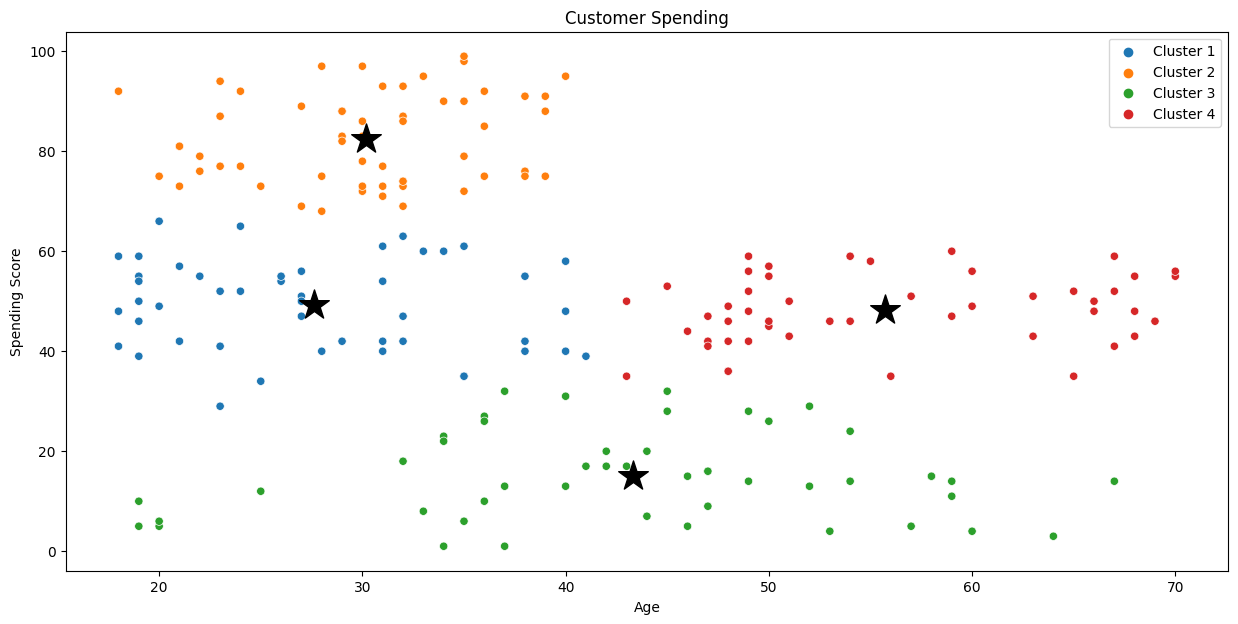

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(figsize=(15,7))
# plot clusters
sns.scatterplot(x=clusters['Age'], y=clusters['Spending Score (1-100)'], ax=axes, hue=labels, legend='full')
# plot centroid
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, c='k', label='Centroids')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Spending")
plt.show()

In [ ]:
#SEGMENTATION BETWEEN AGE,SPENDING SCORE,ANNUAL INCOME

In [ ]:
df.columns


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
B = list(zip(df['Age'],df['Spending Score (1-100)'],df['Annual Income (k$)']))
B[:3]

[(19, 39, 15), (21, 81, 15), (20, 6, 16)]

In [ ]:
wcss = []
k_values = range(1,16)  # K clusters from 1 to 15
for K in k_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(B)
    wcss.append(kmeans.inertia_)

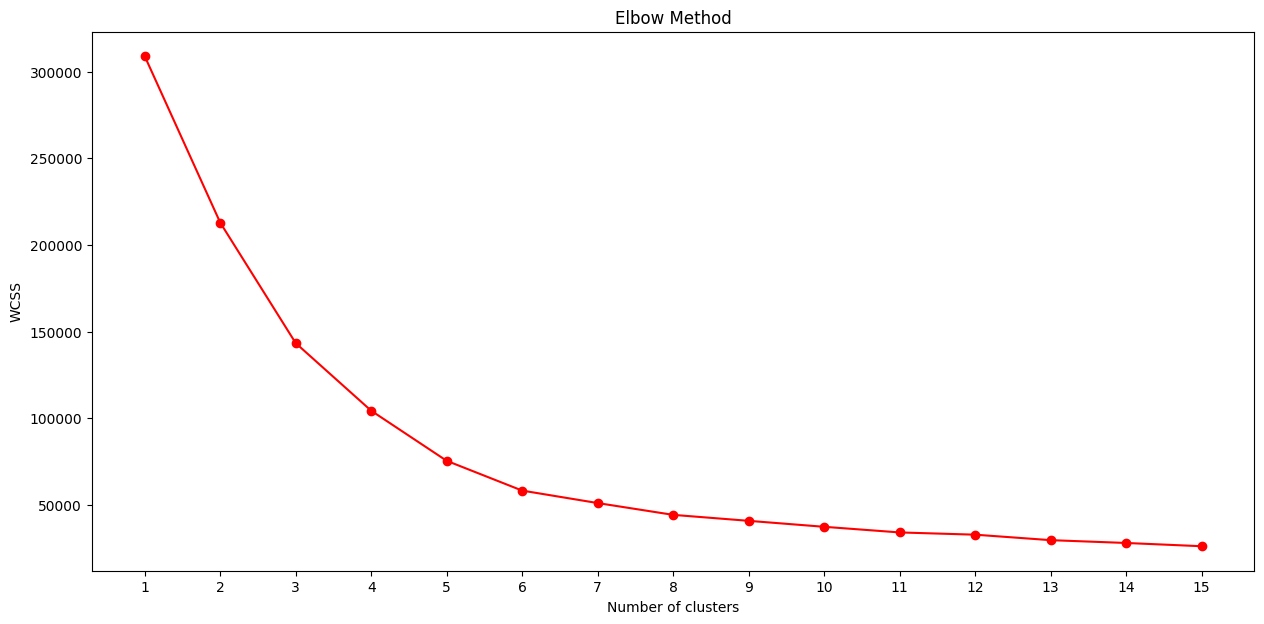

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(k_values, wcss, c='r', marker='o')
plt.xticks(k_values)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
#K-OPTIMAL VALUE BY ELBOW METHOD=5

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(B)
centroids = kmeans.cluster_centers_
print(centroids)

[[43.08860759 49.56962025 55.29113924]
 [32.69230769 82.12820513 86.53846154]
 [25.52173913 78.56521739 26.30434783]
 [45.2173913  20.91304348 26.30434783]
 [40.66666667 17.58333333 87.75      ]]


In [ ]:
cluster = kmeans.predict(B)
cluster

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [ ]:
clusters = df[['Age', 'Spending Score (1-100)','Annual Income (k$)']]
clusters['Cluster'] = cluster
clusters.head()

,Age,Spending Score (1-100),Annual Income (k$),Cluster
0,19,39,15,3
1,21,81,15,2
2,20,6,16,3
3,23,77,16,2
4,31,40,17,3


In [ ]:
labels = ["Cluster "+str(c+1) for c in clusters['Cluster']]
set(labels)

{'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'}

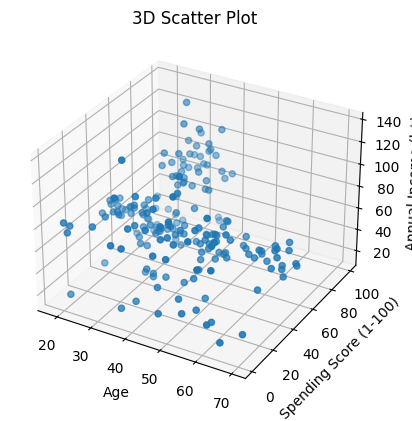

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some random data
x = clusters['Age']
y = clusters['Spending Score (1-100)']
z = clusters['Annual Income (k$)']

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x,y,z)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


In [ ]:
clf=

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

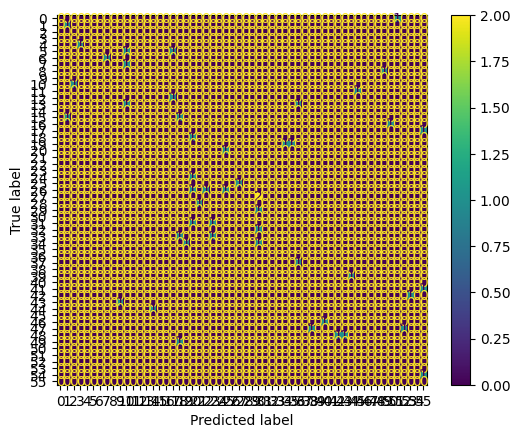

In [ ]:
ConfusionMatrixDisplay(cm,clf.classes_).plot()